# Overview of Python

This is a sweeping overview of Python. This is best taken as a supplement to your study, or a reference guide.

## Objectives:

* Birds-eye overview of Python syntax
* History of Python (2 vs. 3)
* Packages for Python
* Tools for Python

## Disclamer

We are focusing on Python 3 for most of the course, but for reference, I'll note when features became available for this set of slides only. Most things are applicable to both versions. Also, if using Python 2, include the following line:

```python
from __future__ import print_function, division, absolute_import
```

> Python 3 came out 10 years ago. Python 2 [is dying in 2020](https://pythonclock.org). Packages are [dropping support](http://python3statement.org). Please convince everyone you work with to go to Python 3 if they can!

# Basics of Python

* The ultimate source: [Python docs](https://docs.python.org/3.6/index.html)
* Variables are dynamically typed

In [1]:
my_int = 3  # Python 2 has two integers, normal and long
my_float = 3.0
my_str = "hi"  # Strings come in different flavors, like r"raw".
my_complex = 1j
my_bool = True
# None is it's own type. Odd.

my_list = [0, 1, 2, 3]  # Can be changed later
my_tuple = (0, "anything")  # Can't be changed later
my_dict = {"one": 1, "two": 2}  # Order preserved in Python 3.6+
my_set = {1, 2, 3}

* Special values:

In [2]:
special_values = (None, True, False, Ellipsis)

* Last uncaptured value: `_`
* Indexing arrays: `[value]`
    * Multi-dimensional arrays supported by language, but not in standard library
* Slicing arrays: `[first:last:step]`
    * Can omit `:step` or either/both values
    * Does not include final value
    * The length of the result is `last - first`
    * `...` means "all the rest"

See [An informal introduction to Python](https://docs.python.org/3.6/tutorial/introduction.html)

Overview of syntax:
* Indented blocks with `:`
* Classes and functions create scope
* Function parameters can be optional or keyword only
* Iteration built into the language

```python
for x in iterable: ...
listing = [x for x in iterable if True]
listing = list(iterable)
```

Common stumbling blocks:
* Mutable vs Immutable (only some built-ins immutable)
* Assignment *replaces* the variable

In [3]:
x = [1, 2]
y = x
x[:] = [3, 4]

What is printed with `print(x,y)` ?

In [4]:
print(x, y)

[3, 4] [3, 4]


In [5]:
x = [5, 6]

In [6]:
print(x, y)

[5, 6] [3, 4]


## Keywords

[Exhaustive and complete](https://docs.python.org/3.6/reference/lexical_analysis.html#identifiers) list:

```python
False      class      finally    is         return
None       continue   for        lambda     try
True       def        from       nonlocal   while
and        del        global     not        with
as         elif       if         or         yield
assert     else       import     pass       async
break      except     in         raise      await
```

Python 2: add `print` and `exec`, remove `nonlocal`
Python before 3.7: remove `async` and `await`

## Built in functions

[Every function](https://docs.python.org/3.7/library/functions.html) Python 3.7 offers:

|       ...       |      ...      |     ...        |      ...   |    ...      |
|-----------------|---------------|----------------|------------|-------------|
| `abs()`         | `dict()`      | `help()`       | `min()`    | `setattr()` |
| `all()`         | `dir()`       | `hex()`        | `next()`   | `slice()`   |
| `any()`         | `divmod()`    | `id()`         | `object()` | `sorted()`  |
| `ascii()`       | `enumerate()` | `input()`    | `oct()` | `staticmethod()` |
| `bin()`         | `eval()`      | `int()`        | `open()`   | `str()`     |
| `bool()`        | `exec()`      | `isinstance()` | `ord()`    | `sum()`     |
| `bytearray()`   | `filter()`    | `issubclass()` | `pow()`    | `super()`   |
| `bytes()`       | `float()`     | `iter()`       | `print()`  | `tuple()`   |
| `callable()`    | `format()`    | `len()`        | `property()` | `type()`  |
| `chr()`         | `frozenset()` | `list()`       | `range()`  | `vars()`    |
| `classmethod()` | `getattr()`   | `locals()`     | `repr()`   | `zip()`     |
| `compile()`     | `globals()`   | `map()`   | `reversed()` | `__import__()` |
| `complex()`     | `hasattr()`   | `max()`       | `round()` | `breakpoint()`|
| `delattr()`     | `hash()`      | `memoryview()` | `set()`    |             |


You could even get this list in Python itself!

```python
# All builtins are available in the builtins module
import builtins

# Iterate over the contents of the module
for item in dir(builtins):

    # Items are strings; only look at the ones]
    # that start with a lower case letter
    if item[0] != item[0].upper():
        print(item)
```

# Control statements

The `if` statement:

In [7]:
x = True
if x:
    print("x was true")
else:
    print("x was not true")

x was true


The for each loop:

In [8]:
a = "abcdefg"
for item in a:
    print(item)

a
b
c
d
e
f
g


You can also use `for item in range(N)` to count over a range of values, or `while CONDITION:`.  You can use `for` (and `if`) inside `[]`, `()`, or `{}` to build the data structures mentioned above inplace.

In [9]:
bad_way_to_make_a_set_of_tens = {x for x in range(100) if x % 10 == 0}
bad_way_to_make_a_set_of_tens

{0, 10, 20, 30, 40, 50, 60, 70, 80, 90}

### With

With lets you take code like this:

```python
f = open(filename)
txt = f.read()
f.close() # Don't forget me!
```

and write instead:

```python
with open(filename) as f:
    txt = f.read()
# File automatically closed here!
```

With simply runs code at the start and at the end of a block. It also promises the code at the end runs, even if there's an error!

## More Functions

You can define your own functions:

In [10]:
def my_function(value, another=None):
    if another is not None:
        return another
    else:
        return value

In [11]:
print(my_function(2), my_function(3, 4), my_function(3, another=4))

2 4 4


#### Special function: iterator

In [12]:
def my_iterator():
    for i in range(5):
        yield i * 2

In [13]:
for j in my_iterator():
    print(j)

0
2
4
6
8


Decorators are objects that can modify functions or classes:

```python
@change_a_function
def something():
    return 1
```

is the same as

```python
def something():
    return 1

something = change_a_function(something)
```

## Types and classes

* Everything in Python is an object (an instance of a class)

In [14]:
class MyFunctionLike(object):
    def __init__(self, value=2):
        self.value = value

    def __call__(self, value):
        return value * self.value

In [15]:
f2 = MyFunctionLike(2)
f3 = MyFunctionLike(3)

print(f2(2), f3(2))

4 6


* Lots of special methods are available
* Can customize almost all behavior
* Lookup for normal members goes `object -> class -> parent class`
* Lookup for special methods starts with the class
* Member lookup can be intercepted

Creating an object looks like this:

1. Capture the local variables in class statement
2. Process the variables using metaclass (normally type) (improved in Python 3)
2. `class.__new__` `->` create object
3. `object.__init__` : prepare object

Special decorators:
* `@property`: Make a property function
* `@classmethod`: Make a method runnable from the class
* `@staticmethod`: Make a method not depend on anything in class

In [16]:
class MyTest(object):
    @property
    def x(self):
        return 3

    @staticmethod
    def y():
        return 2

In [17]:
print(MyTest.y(), MyTest().x)

2 3


## Reflection

Python knows everything about objects (basically)

In [18]:
def simple(x):
    "This is help"
    return x * 2


print(dir(simple))

['__annotations__', '__call__', '__class__', '__closure__', '__code__', '__defaults__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__get__', '__getattribute__', '__globals__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__kwdefaults__', '__le__', '__lt__', '__module__', '__name__', '__ne__', '__new__', '__qualname__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__']


In [19]:
help(simple)

Help on function simple in module __main__:

simple(x)
    This is help



In [20]:
import inspect

print(inspect.getsource(simple))

def simple(x):
    "This is help"
    return x * 2



Signature details are available in Python 2, but are much more elegant in Python 3.

In [21]:
inspect.signature(simple)

<Signature (x)>

In [22]:
inspect.getfile(inspect)

'/usr/share/miniconda/envs/compclass/lib/python3.7/inspect.py'

## Exceptions

Errors are usually exceptions in Python.

In [23]:
def make_an_error():
    raise RuntimeError("I'm an error!")


# Try uncommenting this
# make_an_error()

In [24]:
try:
    make_an_error()
except RuntimeError as e:
    print(e, "But I don't care, continuing anyway")

I'm an error! But I don't care, continuing anyway


You can catch errors like `ImportError` and then fix the problem, etc.

The only exception: segfault (C error) (but can still get some info about it in Python 3)

There are two blocks that also show up in Python: `finally` and `else`. Finally will run regardless of if an exception was caught or not, and else will run only if an exception was not caught. You can also use `else` on a loop, where it only runs if `break` was not used to exit the loop. (While we are at it, Python provides `continue` to keep going in the loop as well)

In [25]:
for i in range(10):
    print("Breaking out:")
    # break
else:
    print("Did not break out")

Breaking out:
Breaking out:
Breaking out:
Breaking out:
Breaking out:
Breaking out:
Breaking out:
Breaking out:
Breaking out:
Breaking out:
Did not break out


## Anatomy of a package

Folders and packages are intrinsically linked in Python.

```python
import one
from two import three
from four.five import six
```

* `one` could be `one.py` or `one/__init__.py`
* `three` could be in a package or another package
* All package **folders** should contain `__init__.py`
* Relative imports `from .one` are available **inside** a package

### Making an installable package

* Running code requires that it be in `sys.path` (made from `$PATH` and `$PYTHONPATH` and the local dir)
* Installing a package puts the code or a link to it in system or local `site-packages`

To be installable:

* Make a setup.py file in root folder, follow examples
* Use `pip install -e .` (recommended) or `python setup.py develop` (not recommended)

# History of Python: 2 vs. 3

* Python started in 1991 by Guido Van Rossum
* Based on the learner's language ABC
* Released at the right time
* Python 2.4 had a huge user base by the time Python 3 was released

So why is Python 3 better and why is Python 2 still common?

TL;DR: Python 3 removes bad features and backward incompatible is slow when you have millions of lines of code.

See [the great talk](http://www.asmeurer.com/python3-presentation/slides.html#1)

# Changes

* Many of the improvements were backported to 2.6 and 2.7 (from 3.0 and 3.1)
* Some stylistic changes (print is a function, etc)
* Some removals not back-portable (function iterator unpacking)
* Most changes covered by the packages: [six](https://pythonhosted.org/six/) or [future](https://pypi.python.org/pypi/future)

## Iterator unpacking
* Better support for `*list` and `**dict`, especially in 3.5

```
first, *rest, last = range(10)
```

## Keyword only arguments

* No longer need to fake this with manual keyword dictionary, more natural

## Unicode
* Biggest change for libraries
* Strings are unicode (old strings are now bytes)
* Unicode variable names!

```python
π=3.1415926535
```

## Chained exceptions

* Errors are clearer when several occur

## Iterators
* Iterators instead of duplicate functions

```python
for i in range(1000000000000):
   print("Your computer will die in Python 2!")
```
* May require wrapping some functions with `list`

* You can now `yield from` another iterator (3.4)

## Comparison fixed
* You can no longer compare everything
* `"two" < 1` is now an error instead of the wrong answer!

## Type support

* Still duck-typed (dynamically typed)
* Added function (3.0) and variable (3.6) annotations
* Tools like PyCharm and mypy can do static analysis

## Matrix multiplication operator (3.5)

* The `@` symbol was added for matrix multiplication

## F-strings (3.6)

* Format strings allow inline python in strings

In [26]:
x = 3
print(f"This is {x} and x+1={x+1}")
print("This is {} and x+1={}".format(x, x + 1))
print("This is %i and x+1=%i" % (x, x + 1))

This is 3 and x+1=4
This is 3 and x+1=4
This is 3 and x+1=4


## Easy breakpoints for debugging (3.7)

A new breakpoint builtin function was added to make breakpoints easier to set, and easier to customize.

# Packages for Python

As you could see, Python is simple. To do real work in Python, you need libraries.

The best library for Python: the Python standard library (included).

* Usually pretty good, covers many use cases
* Does not evolve, better options usually available
* Most Python 3 additions available as external libraries for Python 2

#### Small sampling

* `sys`, `os`: system tools
* `re`: regular expressions
* `math`, `time` and friends, `pathlib` (3 or backport), `functools`, `itertools`, `pdb`, ...

See [PMOTW3 (or PMOTW2)](https://pymotw.com/3/).

There are many more common packages that can be downloaded from [pypi](https://pypi.python.org/pypi) with `pip`:

#### For scientists: The big three
* `numpy`: Numerical python (matrix and array)
* `scipy`: More specialized additions to numpy
* `matplotlib`: The classic plotting package
* `pandas`: A replacement for `R` or Excel, tabular data

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

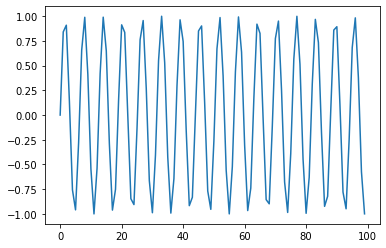

In [28]:
x = np.arange(100)
plt.plot(x, np.sin(x))
plt.show()

#### Other useful libraries
* `sympy`: Symbolic mathematics as Python objects
* `plumbum`: Set of tools for command line programming (calling other programs, command line arguments, paths, remote connections, color)
* `numba`: Compile python into CPU, OpenMP, or CUDA code
* `pytest`: Better testing for your code in python
* `setuptools`: The continued development of Python packaging
* `tensorflow`: Google's computation engine designed for ML
* `Cython`: The C++ and Python mix for compiled python-like code

# Tools for Python

## Jupyter

The interactive language project, make up of:

* Jupyter notebook: A html interface to IPython and other kernels
* IPython: a kernel that extends Python
* Lots of other kernels being developed (ROOTbook, etc)

This is the first project to drop support for Python 2!

IPython language extensions:
```python
%line_magic
%%cell_magic
help?
!command
```

* History (input and output cells stored)
* IPython has access to the original text before processed by Python
* IPython looks for special methods to print formatted objects
* Example: `%debug` after an exception drops you into `pdb`
* Example: `%timeit` will run a command multiple times and get the timing info

### Jupyter Notebooks

* Powerful interactive environment
* Great for remote servers or websites
* Inline plots, widgets, etc
* Cells in markdown, with code and $m \alpha \tau h$ support
* Converts to PDF, slides, etc.
* Great for prototyping
* Fledgling project: [nteract](https://github.com/nteract/nteract) for desktop application
* Future project: [Juypter Lab](https://github.com/jupyterlab/jupyterlab) for web environment with multiple components

#### Useful shortcuts (more in help->keyboard shortcuts)

* Shift-tab: Help
* Shift-tab-tab: More help (etc.)
* Tab: Auto-completion (existing objects only for IPython < 5)

## JupyterLab

The newest and shiniest member of the IPython/Jupyter family. It's a home for notebooks and other types of windows, all in a single browser window. The notebook has some nice updates, too, like drag-n-drop cells and collapsible input. Not ready for major sites yet, but good enough for you to run it on your own.

## Packaging in Python

### pip

The Package Installer for Python, any package should be able to be installed with this.

* Easy to get (ensurepip in latest Python 2.7 or Python 3.4+, `getpip.py` before that)
* Can download binaries now instead of just source
* Interacts with environments nicely

```bash
pip install a_package
pip install --user local_package
pip install --upgrade pip
pip install -e .
```

## [Anaconda](https://www.continuum.io/anaconda-overview)

* A science focused distribution of Python
* Contains Python 2 or/and 3
* Highly optimized Numpy and friends with help from Intel
* Contains the Conda package manager and ~100 packages, with ~400 optional packages

### Conda

* Designed to manage binary packages (mostly Python related)
* Built in support for environments
* Can manage Python itself!

```bash
conda create -n my_python_27_env python=2.7 anaconda
source activate my_python_27_env
conda install paramiko
pip install plumbum
```

## IDEs for Python

### PyCharm

* If you need to develop a package, PyCharm is impressive
* All the features you could ever want, plus many more
* Free community edition is great

### Spyder

* An open-source Matlab like IDE
* Used to be part of Python(x,y) for Windows, now on pip and in anaconda

### IDLE

* A basic editor that comes with every Python